In [1]:
import cv2
import json
import os
from linkeaction import SinglePersonSVM
import numpy as np

In [2]:
img_dir = "data/classroom/to_label"
out_dir = "data/classroom/to_label_rendered"
pose_data = json.load(open("data/classroom/to_label_cropped_pose.json", "r"))

model = SinglePersonSVM(weights_path="weights/pose_svm_all.pkl")

idx2act = ["", "sleep", "raise hand", "take note", "use phone"]

for filename in os.listdir(img_dir):
    if filename.endswith(".jpg"):
        img = cv2.imread(f"{img_dir}/{filename}")
        t = filename[:-4]
        
        ljy_pose = pose_data[f"{t}_ljy.jpg"]
        ljy_label = idx2act[model.predict(ljy_pose)]
        x0, y0 = 920, 280
        
        for p in ljy_pose:
            x, y, c = p
            if x > 0:
                cv2.circle(img, (int(x)+x0, int(y)+y0), 5, (0,255,0), -1)
        cv2.rectangle(img, (x0,y0), (x0+250,y0+300), (255,0,0), 3)
        cv2.putText(img, ljy_label, (x0,y0-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        
        zyf_pose = pose_data[f"{t}_zyf.jpg"]
        zyf_label = idx2act[model.predict(zyf_pose)]
        x0, y0 = 600, 300
        
        for p in zyf_pose:
            x, y, c = p
            if x > 0:
                cv2.circle(img, (int(x)+x0, int(y)+y0), 5, (0,255,0), -1)
        cv2.rectangle(img, (x0,y0), (x0+250,y0+300), (255,0,0), 3)
        cv2.putText(img, zyf_label, (x0,y0-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        
        cv2.imwrite(f"{out_dir}/{filename}", img)

Weights loaded from weights/pose_svm_all.pkl.


In [3]:
from matplotlib import pyplot as plt

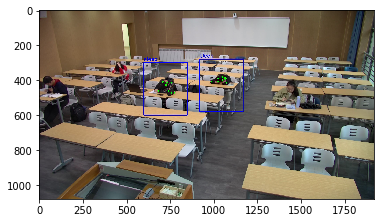

In [4]:
img = cv2.imread("data/classroom/to_label_rendered/5107_1_yuanmu_test1_1637206994_1020.jpg")
img_ = img[:,:,::-1]
plt.imshow(img_)

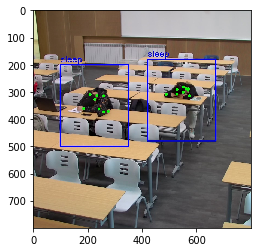

In [5]:
x = 500
w = 800
y = 100
h = 800

crop_img = img[y:y+h, x:x+w]
crop_img_ = crop_img[:,:,::-1]
plt.imshow(crop_img_)

In [6]:
idx = 0
x = 500
w = 800
y = 100
h = 800

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('data/classroom/to_label_rendered.mp4', fourcc, 5.0, (800,800))

while idx < 5820:
    img_path = f"data/classroom/to_label_rendered/5107_1_yuanmu_test1_1637206994_{idx}.jpg"
    try:
        img = cv2.imread(img_path)
        crop_img = img[y:y+h, x:x+w]
        out.write(crop_img)
    except:
        idx += 30
        continue
    idx += 30
    
out.release()